In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:

games_df = pd.read_csv('data/downsized/games.csv')
users_df = pd.read_csv('data/downsized/users.csv')

In [3]:
games_df.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck'],
      dtype='object')

In [35]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   app_id            2494 non-null   int64         
 1   title             2494 non-null   object        
 2   date_release      2494 non-null   datetime64[ns]
 3   win               2494 non-null   bool          
 4   mac               2494 non-null   bool          
 5   linux             2494 non-null   bool          
 6   rating            2494 non-null   object        
 7   positive_ratio    2494 non-null   int64         
 8   user_reviews      2494 non-null   int64         
 9   price_final       2494 non-null   float64       
 10  price_original    2494 non-null   float64       
 11  discount          2494 non-null   float64       
 12  steam_deck        2494 non-null   bool          
 13  date_release_map  2494 non-null   datetime64[ns]
 14  year              2494 n

In [36]:
games_df.describe()

,app_id,date_release,positive_ratio,user_reviews,price_final,price_original,discount,date_release_map,year,day_of_week,month,day_of_month,day_of_year,timestamp
count,2.494000e+03,2494,2494.000000,2.494000e+03,2494.000000,2494.000000,2494.000000,2494,2494.000000,2494.00000,2494.000000,2494.000000,2494.000000,2.494000e+03
mean,8.658129e+05,2018-11-25 23:44:59.278267648,85.283881,2.785680e+04,19.129198,15.237338,6.039294,2018-11-25 23:44:59.278267648,2018.365277,2.22093,6.965116,15.837209,196.658380,1.543189e+09
min,1.000000e+01,1998-11-08 00:00:00,37.000000,1.000000e+01,0.000000,0.000000,0.000000,1998-11-08 00:00:00,1998.000000,0.00000,1.000000,1.000000,1.000000,9.104832e+08
25%,3.888075e+05,2016-11-05 00:00:00,80.000000,8.142500e+02,9.752500,0.000000,0.000000,2016-11-05 00:00:00,2016.000000,1.00000,4.000000,9.000000,110.000000,1.478304e+09
50%,8.143750e+05,2019-10-16 12:00:00,88.000000,3.491000e+03,16.995000,14.990000,0.000000,2019-10-16 12:00:00,2019.000000,2.00000,7.000000,16.000000,209.000000,1.571227e+09
75%,1.272242e+06,2021-11-01 00:00:00,93.000000,1.434975e+04,24.990000,19.990000,0.000000,2021-11-01 00:00:00,2021.000000,3.00000,10.000000,23.000000,286.000000,1.635725e+09
max,2.220810e+06,2023-08-22 00:00:00,100.000000,7.494460e+06,149.990000,149.990000,90.000000,2023-08-22 00:00:00,2023.000000,6.00000,12.000000,31.000000,363.000000,1.692662e+09
std,5.438575e+05,NaN,10.101670,1.783914e+05,14.824553,14.595069,18.742541,NaN,3.684305,1.37674,3.340904,8.604281,100.893102,1.162955e+08


In [37]:
games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,date_release_map,year,day_of_week,month,day_of_month,day_of_year,timestamp
0,250460,Bridge Constructor,2013-10-16,True,True,True,Mostly Positive,77,716,2.39,19.99,88.0,True,2013-10-16,2013,2,10,16,289,1.381882e+09
1,321290,Dandelion - Wishes brought to you -,2014-09-29,True,True,False,Very Positive,85,589,29.99,29.99,0.0,True,2014-09-29,2014,0,9,29,272,1.411949e+09
2,367670,Controller Companion,2015-05-04,True,False,False,Very Positive,90,2323,2.99,2.99,0.0,True,2015-05-04,2015,0,5,4,124,1.430698e+09
3,371970,Barony,2015-06-23,True,True,True,Very Positive,92,3713,20.00,0.00,0.0,True,2015-06-23,2015,1,6,23,174,1.435018e+09
4,35000,Mini Ninjas,2009-09-08,True,False,False,Very Positive,90,2895,9.99,9.99,0.0,True,2009-09-08,2009,1,9,8,251,1.252368e+09


In [4]:
# Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
#        'positive_ratio', 'user_reviews', 'price_final', 'price_original',
#        'discount', 'steam_deck'],
#       dtype='object')

APP_ID = 'app_id'
TITLE = 'title'
DATE_RELEASE = 'date_release'
WIN = 'win'
MAC = 'mac'
LINUX = 'linux'
RATING = 'rating'
POSITIVE_RATIO = 'positive_ratio'
USER_REVIEWS = 'user_reviews'
PRICE_FINAL = 'price_final'
PRICE_ORIGINAL = 'price_original'
DISCOUNT = 'discount'
STEAM_DECK = 'steam_deck'



In [6]:
# Separate into the Year, Day of the week from teh date release
games_df['date_release_map'] = games_df['date_release'].map(lambda x: pd.to_datetime(x))
games_df['year'] = games_df['date_release_map'].map(lambda x: x.year)
games_df['day_of_week'] = games_df['date_release_map'].map(lambda x: x.dayofweek)
games_df['month'] = games_df['date_release_map'].map(lambda x: x.month)
games_df['day_of_month'] = games_df['date_release_map'].map(lambda x: x.day)
games_df['day_of_year'] = games_df['date_release_map'].map(lambda x: x.dayofyear)


In [10]:
games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,date_release_map,year,day_of_week,month,day_of_month,day_of_year
0,250460,Bridge Constructor,2013-10-16,True,True,True,Mostly Positive,77,716,2.39,19.99,88.0,True,2013-10-16,2013,2,10,16,289
1,321290,Dandelion - Wishes brought to you -,2014-09-29,True,True,False,Very Positive,85,589,29.99,29.99,0.0,True,2014-09-29,2014,0,9,29,272
2,367670,Controller Companion,2015-05-04,True,False,False,Very Positive,90,2323,2.99,2.99,0.0,True,2015-05-04,2015,0,5,4,124
3,371970,Barony,2015-06-23,True,True,True,Very Positive,92,3713,20.00,0.00,0.0,True,2015-06-23,2015,1,6,23,174
4,35000,Mini Ninjas,2009-09-08,True,False,False,Very Positive,90,2895,9.99,9.99,0.0,True,2009-09-08,2009,1,9,8,251


<Axes: xlabel='year'>

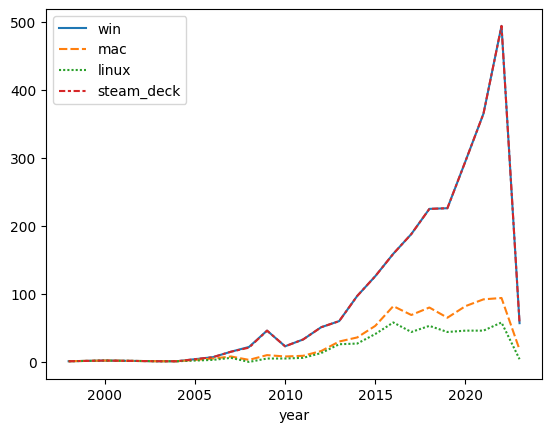

In [7]:
# Plot the count of releases over time.
games_df[DATE_RELEASE] = pd.to_datetime(games_df[DATE_RELEASE])

# Plot multiple lines showing where win is true; mac is true; linux is true; steam_deck is true
distribution_time = games_df.groupby('year')[[WIN, MAC, LINUX, STEAM_DECK]].sum()
# Count of games where win//... is true
# for col in [WIN, MAC, LINUX, STEAM_DECK]:
#     games_df[col] = games_df[col].astype(int)
#     print(games_df.groupby('year')[col].sum().plot(label=col))

sns.lineplot(data=distribution_time)

In [14]:

# positive_ratio  user_reviews price_final price_original discount date_release_map
numerical_games_df = games_df.loc[:, [POSITIVE_RATIO, USER_REVIEWS, PRICE_FINAL, PRICE_ORIGINAL, DISCOUNT, 'date_release_map']]
numerical_games_df.corr()

,positive_ratio,user_reviews,price_final,price_original,discount,date_release_map
positive_ratio,1.000000,0.025092,-0.049780,-0.123429,-0.025807,-0.081420
user_reviews,0.025092,1.000000,-0.010009,-0.124376,-0.037768,-0.092187
price_final,-0.049780,-0.010009,1.000000,0.507691,-0.247857,0.178888
price_original,-0.123429,-0.124376,0.507691,1.000000,0.172316,0.097445
discount,-0.025807,-0.037768,-0.247857,0.172316,1.000000,-0.050579
date_release_map,-0.081420,-0.092187,0.178888,0.097445,-0.050579,1.000000


<Axes: >

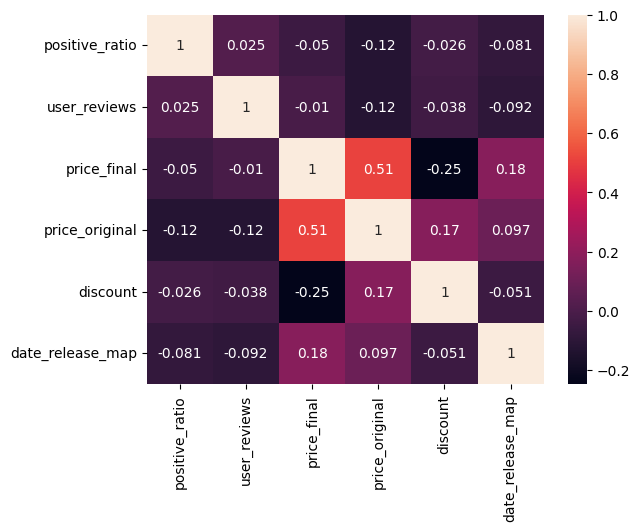

In [15]:
sns.heatmap(numerical_games_df.corr(), annot=True)

<Axes: xlabel='date_release_map', ylabel='price_final'>

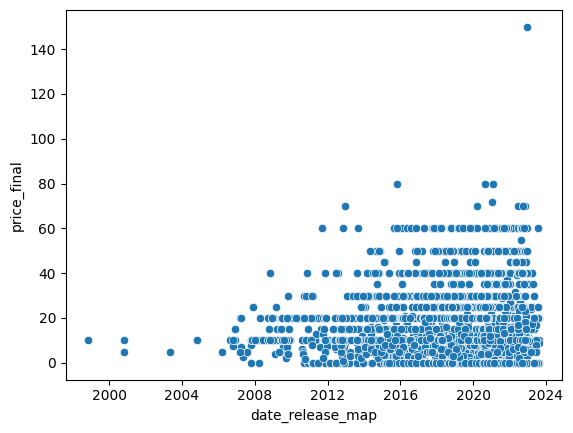

In [16]:
# Plot scatterplot, date released_map and price_final.


sns.scatterplot(data=games_df, x='date_release_map', y='price_final')

In [22]:
# Calculating correlation and p-value
# convert date into timestamp numerical.
games_df['timestamp'] = games_df['date_release_map'].map(lambda x: x.timestamp())
stats.linregress(games_df['timestamp'], games_df['price_final'])


LinregressResult(slope=2.280335179603671e-08, intercept=-16.060694964611162, rvalue=0.1788875400012634, pvalue=2.2192208573272727e-19, stderr=2.512361250724316e-09, intercept_stderr=3.8880387908028458)

In [24]:

stats.linregress(games_df['year'], games_df['price_final'])


LinregressResult(slope=0.7123671572374369, intercept=-1418.6879363285013, rvalue=0.17704261070242314, pvalue=5.218673950220849e-19, stderr=0.07932988627457035, intercept_stderr=160.11695450953366)

<Axes: xlabel='timestamp', ylabel='price_final'>

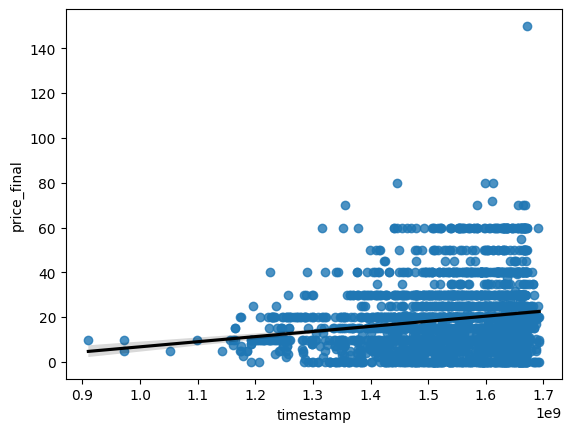

In [23]:
sns.regplot(games_df, x='timestamp', y='price_final', line_kws={'color': 'black'})

<Axes: xlabel='year', ylabel='price_final'>

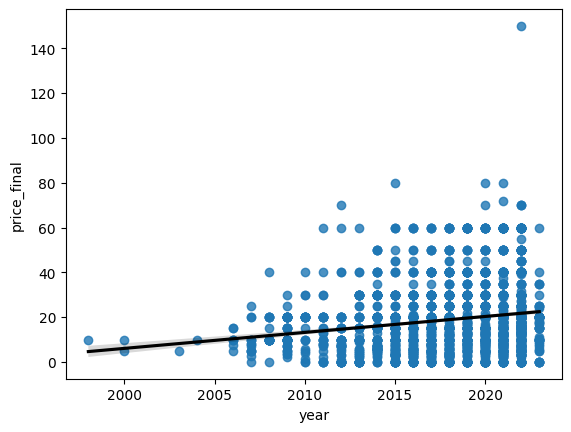

In [25]:
sns.regplot(games_df, x='year', y='price_final', line_kws={'color': 'black'})

## Users

In [26]:
users_df.columns

Index(['user_id', 'products', 'reviews'], dtype='object')

In [32]:
users_df.describe()

,user_id,products,reviews
count,4.860086e+06,4.860086e+06,4.860086e+06
mean,7.230036e+06,1.396006e+02,3.926770e+00
std,4.100697e+06,2.796174e+02,1.097545e+01
min,5.000000e+00,0.000000e+00,1.000000e+00
25%,3.731856e+06,2.600000e+01,1.000000e+00
50%,7.186636e+06,6.700000e+01,2.000000e+00
75%,1.097398e+07,1.570000e+02,4.000000e+00
max,1.430606e+07,3.221400e+04,6.045000e+03


In [33]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860086 entries, 0 to 4860085
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   products  int64
 2   reviews   int64
dtypes: int64(3)
memory usage: 111.2 MB


In [27]:
users_df.corr()

,user_id,products,reviews
user_id,1.000000,0.089937,0.026429
products,0.089937,1.000000,0.261082
reviews,0.026429,0.261082,1.000000


<Axes: >

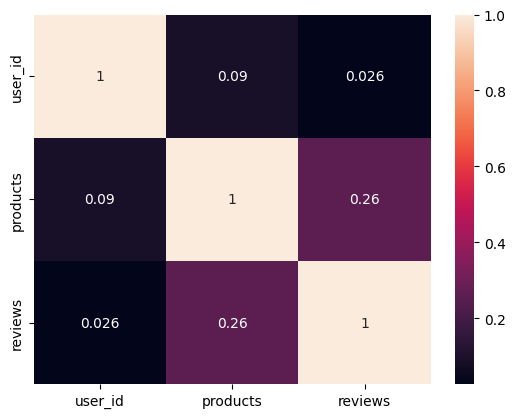

In [28]:
sns.heatmap(users_df.corr(), annot=True)

In [30]:
stats.linregress(users_df['products'], users_df['reviews'])

LinregressResult(slope=0.010247892105439567, intercept=2.4961577152304013, rvalue=0.26108160816033527, pvalue=0.0, stderr=1.718724277576529e-05, intercept_stderr=0.0053715068776441915)